In [2]:
import os
import shutil
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
from keras.applications.mobilenet import MobileNet
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# create a data generator
datagen = ImageDataGenerator()

In [4]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('C:/Users/kheen/Documents/food-101-keras/food-101/food-101/data/train/', target_size=(224, 224), color_mode="rgb", batch_size=32, class_mode="categorical", shuffle=True, seed=42)

# load and iterate training dataset
val_it= datagen.flow_from_directory('C:/Users/kheen/Documents/food-101-keras/food-101/food-101/data/Validate/', target_size=(224, 224), color_mode="rgb", batch_size=32, class_mode="categorical", shuffle=True, seed=42)

# load and iterate test dataset
test_it = datagen.flow_from_directory('C:/Users/kheen/Documents/food-101-keras/food-101/food-101/data/test/', target_size=(224, 224), color_mode="rgb", batch_size=32, class_mode="categorical", shuffle=True, seed=42)

Found 65650 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [6]:
X, y = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (X.shape, X.min(), X.max()))

Batch shape=(32, 224, 224, 3), min=0.000, max=255.000


In [7]:
input_shape = (224,224,3)
num_classes = 101

In [8]:
# MobileNet model, with weights pre-trained on ImageNet.
mobilenet = MobileNet(input_shape, weights='imagenet', include_top=False)

In [9]:
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 101)               25957     
Total params: 16,100,133
Trainable params: 16,078,245
Non-trainable params: 21,888
_________________________________________________________________


In [10]:
history = model.fit(train_it, steps_per_epoch=16, validation_data=val_it, validation_steps=8, epochs=2)

Epoch 1/2
16/16 [==============================] - 23s 1s/step - loss: 0.0848 - accuracy: 0.9878 - val_loss: 0.0763 - val_accuracy: 0.9896
Epoch 2/2
16/16 [==============================] - 9s 532ms/step - loss: 0.0841 - accuracy: 0.9882 - val_loss: 0.0744 - val_accuracy: 0.9896


In [11]:
# save model
model.save("food_model.h5")

In [12]:

# evaluate model
loss = model.evaluate(test_it, steps=24)

24/24 [==============================] - 3s 135ms/step


In [15]:
# make a prediction
yhat = model.predict(val_it, steps=24)

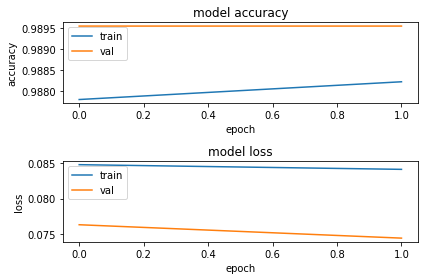

In [16]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()
